Capstone-Project

FindDefault (Prediction of Credit Card fraud)

Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.


Tasks/Activities List 

	Collect the time series data from the CSV file linked here

	Exploratory Data Analysis (EDA) 

	Get the correct datatype for date.

	Balancing the data.

	Feature Engineering and feature selection.

	Train/Test Split - Apply a sampling distribution to find the best split

	Choose the metrics for the model evaluation

	Model Selection, Training, Predicting and Assessment 

	Hyperparameter Tuning/Model Improvement 

	Model deployment plan. 


In [2]:
# Load Required Libraries

import pandas as pd
import numpy as np

# EDA analysis 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import show
from matplotlib.colors import ListedColormap
#from plotnine import *
import matplotlib.pyplot as Pyplot

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats import shapiro
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve, StratifiedShuffleSplit,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification


from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn import over_sampling

In [3]:
import warnings
warnings.warn('foo', DeprecationWarning)
import warnings, sklearn.utils
warnings.warn('bar', DeprecationWarning)

C:\Users\absar\AppData\Local\Temp\ipykernel_1792\255715532.py:2: DeprecationWarning: foo
  warnings.warn('foo', DeprecationWarning)
C:\Users\absar\AppData\Local\Temp\ipykernel_1792\255715532.py:4: DeprecationWarning: bar
  warnings.warn('bar', DeprecationWarning)


In [4]:
# Will create the seperator for better data visualization among each variables
def Line_Separator():
    print('*'*50, '\n')
    
def Line_Separator1():
    print('*'*100, '\n')

Read The Dataset

In [5]:
creditcard = pd.read_csv('creditcard csv')

In [6]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Evaluate number of columns and rows in given dataset

Number_of_row = creditcard.shape[0]
Number_of_column = creditcard.shape[1]

print('Number of rows in creditcard file     :', Number_of_row)
print('Number of columns in creditcard file  :', Number_of_column); Line_Separator()

Number of rows in creditcard file     : 284807
Number of columns in creditcard file  : 31
************************************************** 



In [8]:
# Review columns title in given dataset

print("Columns name in  creditcard file :\n",creditcard.columns.values);Line_Separator1()

Columns name in  creditcard file :
 ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']
**************************************************************************************************** 



In [9]:
# Evaluate number of categorical and numerical features

def data_features (data):
    categorical_features = creditcard.select_dtypes(exclude = [np.number]).columns
    numerical_features = creditcard.select_dtypes(include = [np.number]).columns
    print("Categorical features in  creditcard file :\n",categorical_features);Line_Separator1()
    print("Numerical features in  creditcard file   :\n",numerical_features);Line_Separator1()
    
print(data_features(creditcard))

Categorical features in  creditcard file :
 Index([], dtype='object')
**************************************************************************************************** 

Numerical features in  creditcard file   :
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
**************************************************************************************************** 

None


In [10]:
# Review the datatypes
print("Review the Data Format in  creditcard file :");Line_Separator()
print(creditcard.dtypes);Line_Separator()

Review the Data Format in  creditcard file :
************************************************** 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
************************************************** 



In [11]:
# Identify missing value if any

print("Check if there is any missing value in in  creditcard file :");Line_Separator()
print(round(100*(creditcard.isnull()).sum()/len(creditcard),2).sort_values(ascending=False));Line_Separator()

Check if there is any missing value in in  creditcard file :
************************************************** 

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64
************************************************** 



We are check Missing values, but i have not find any missing values

check summary statistics credit card time column

In [12]:
print("Time variable statistics");Line_Separator()
creditcard['Time'].describe()

Time variable statistics
************************************************** 



count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [13]:
# Data is 48hours, and the values seems to represent the second will convert it to hours - 1hour =3600seconds 

creditcard['Time'] =creditcard['Time']/3600

In [14]:
# Assignment of classes one and zero for visualization 

def replace_data_to_binary(x,y):
    creditcard.Class.replace(x,y, inplace=True)
  
    
replace_data_to_binary(0, 'Non Fraudulent')
replace_data_to_binary(1, 'Fraudulent')

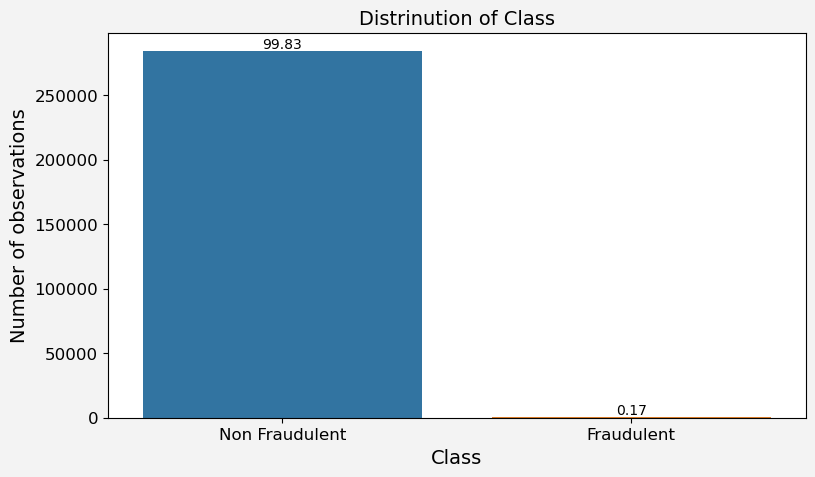

**************************************************************************************************** 



In [15]:
# Readmitted distribution

fig = plt.figure(figsize=(9,5))
fig.set_facecolor("#F3F3F3")
total = float(len(creditcard)) 
ax = sns.countplot(x="Class",  data=creditcard)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of observations', fontsize=14)
plt.title('Distrinution of Class', fontsize =14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(100*height/total), 
            ha="center",va='bottom')
ax.grid(False)
plt.tick_params(labelsize=12)
plt.show();Line_Separator1()

In [16]:
# Evaluate whether data is balanced or not 

total_count_combined_calss = creditcard['Class'].value_counts()
imbalance= (total_count_combined_calss['Fraudulent']/creditcard['Class'].count()*100)/(total_count_combined_calss['Non Fraudulent']/creditcard['Class'].count()*100)*100
print('Imbalance Percentage : ' + str(imbalance));Line_Separator()

Imbalance Percentage : 0.173047500131896
************************************************** 



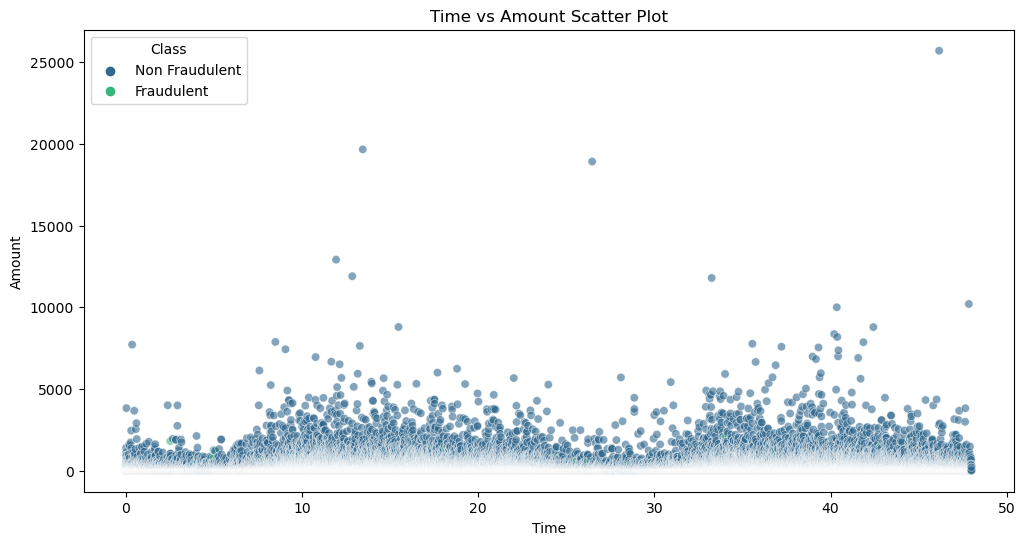

In [17]:
# 1. Time vs Amount scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=creditcard, x='Time', y='Amount', hue='Class', palette='viridis', alpha=0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

In [18]:
print("Amount details of fraudulent transactions:"); Line_Separator()
print(creditcard[creditcard["Class"] == "Fraudulent"].Amount.describe()); Line_Separator1()

print('\n')

print("Amount details of non-fraudulent transactions:"); Line_Separator()
print(creditcard[creditcard["Class"] == "Non Fraudulent"].Amount.describe()); Line_Separator1()


Amount details of fraudulent transactions:
************************************************** 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
**************************************************************************************************** 



Amount details of non-fraudulent transactions:
************************************************** 

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
**************************************************************************************************** 



Evaluate the time vs. amount transaction between fraudulent and non-fraudulent
**************************************************************************************************** 



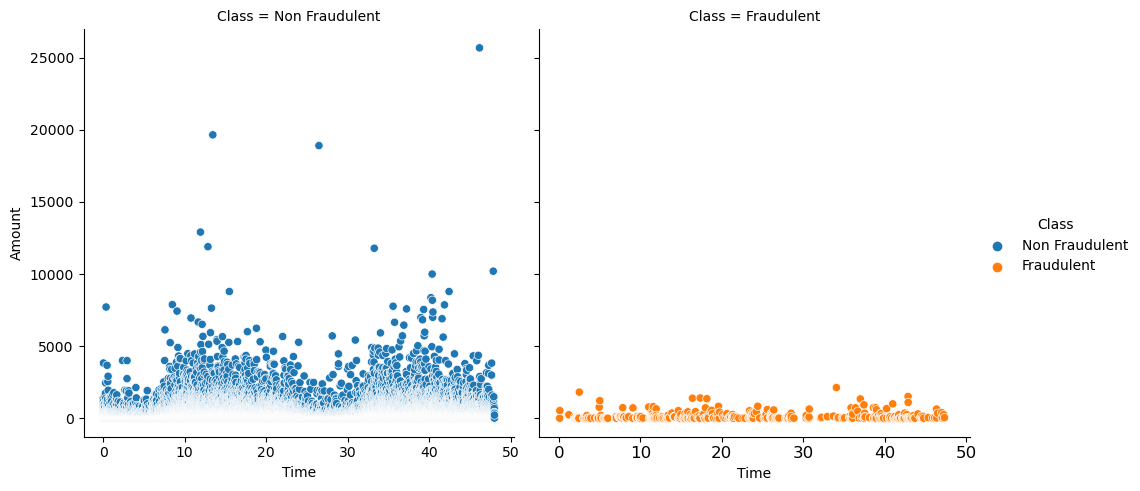

**************************************************************************************************** 



In [19]:
# Evaluate the time vs. amount transaction between fraudulent and non-fraudulent

print("Evaluate the time vs. amount transaction between fraudulent and non-fraudulent");Line_Separator1()
ax=sns.relplot(x="Time", y="Amount",
                 col="Class", hue="Class",
                 kind="scatter", data=creditcard)
plt.tick_params(labelsize=12)
plt.show(); Line_Separator1()

Few insights on the visualization above reveal the following:

The plot indicates that the fraud amounts were less than approx 2.2k.
Fraud pattern indicates that the number of data points is observed between 14 to 20 hours on both days.
We can see a two-picks pattern in time due tonight.

In [20]:
#To assign back the values 'Non Fraudulent' and 'Fraudulent' back to 0 and 1 in the Class
def replace_data_to_binary(x, y):
    creditcard['Class'].replace(x, y, inplace=True)

# Replace 'Non Fraudulent' with 0 and 'Fraudulent' with 1
replace_data_to_binary('Non Fraudulent', 0)
replace_data_to_binary('Fraudulent', 1)

In [21]:
print("After reassigning class to zero and one, we will evaluate the data type ");Line_Separator1()
print(creditcard.dtypes)


After reassigning class to zero and one, we will evaluate the data type 
**************************************************************************************************** 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


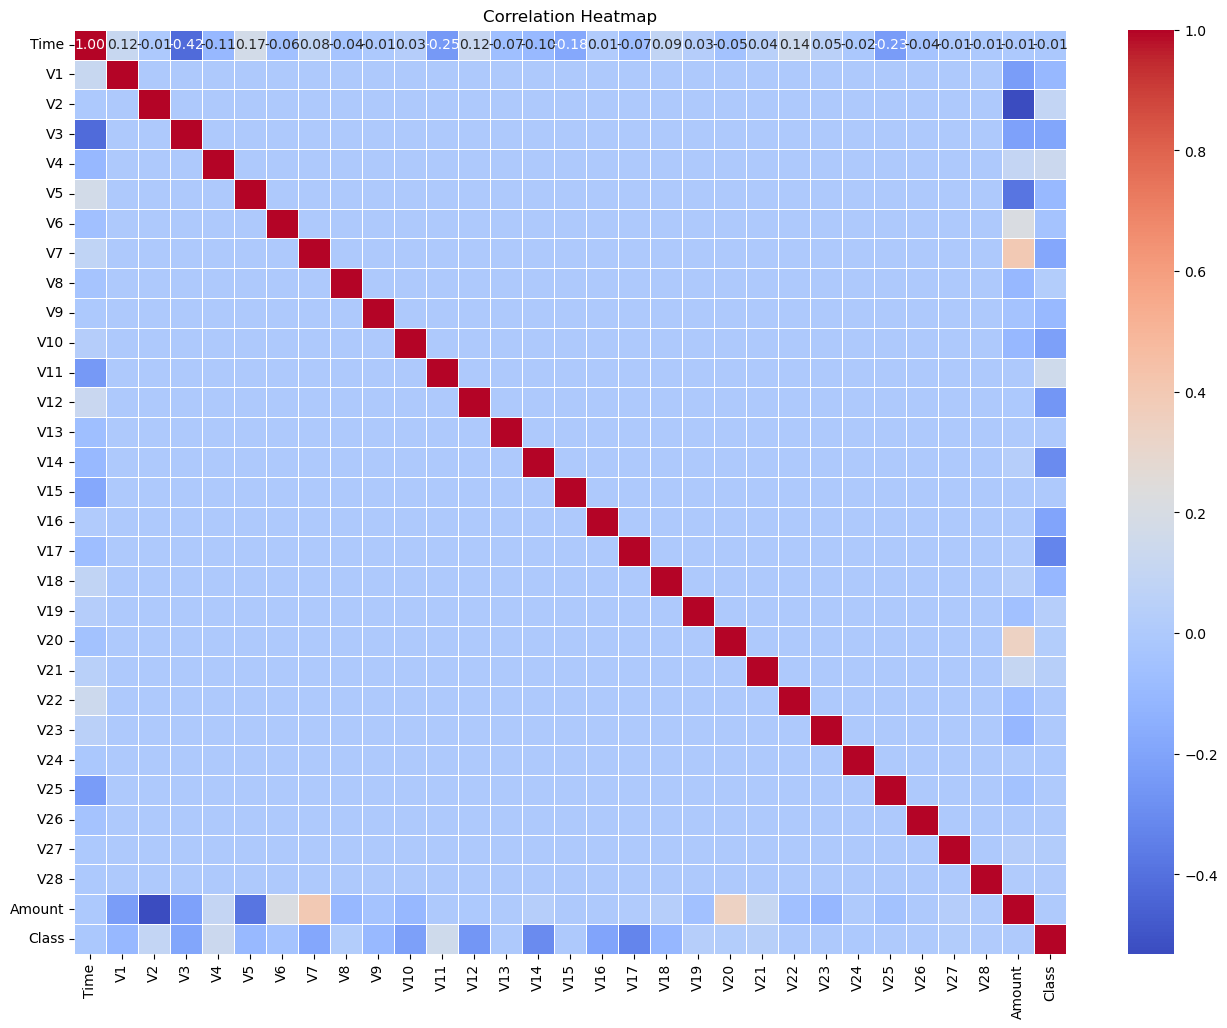

In [22]:
# 3. Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = creditcard.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**************************************************************************************************** 

Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V1 to V12
**************************************************************************************************** 



C:\Users\absar\AppData\Local\Temp\ipykernel_1792\2942389368.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V1'] , color='b',shade=True,label='Non Fraudulent')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\absar\AppData\Local\Temp\ipykernel_1792\2942389368.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V1'] , color='orange',shade=True, label='Fraudulent')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:11

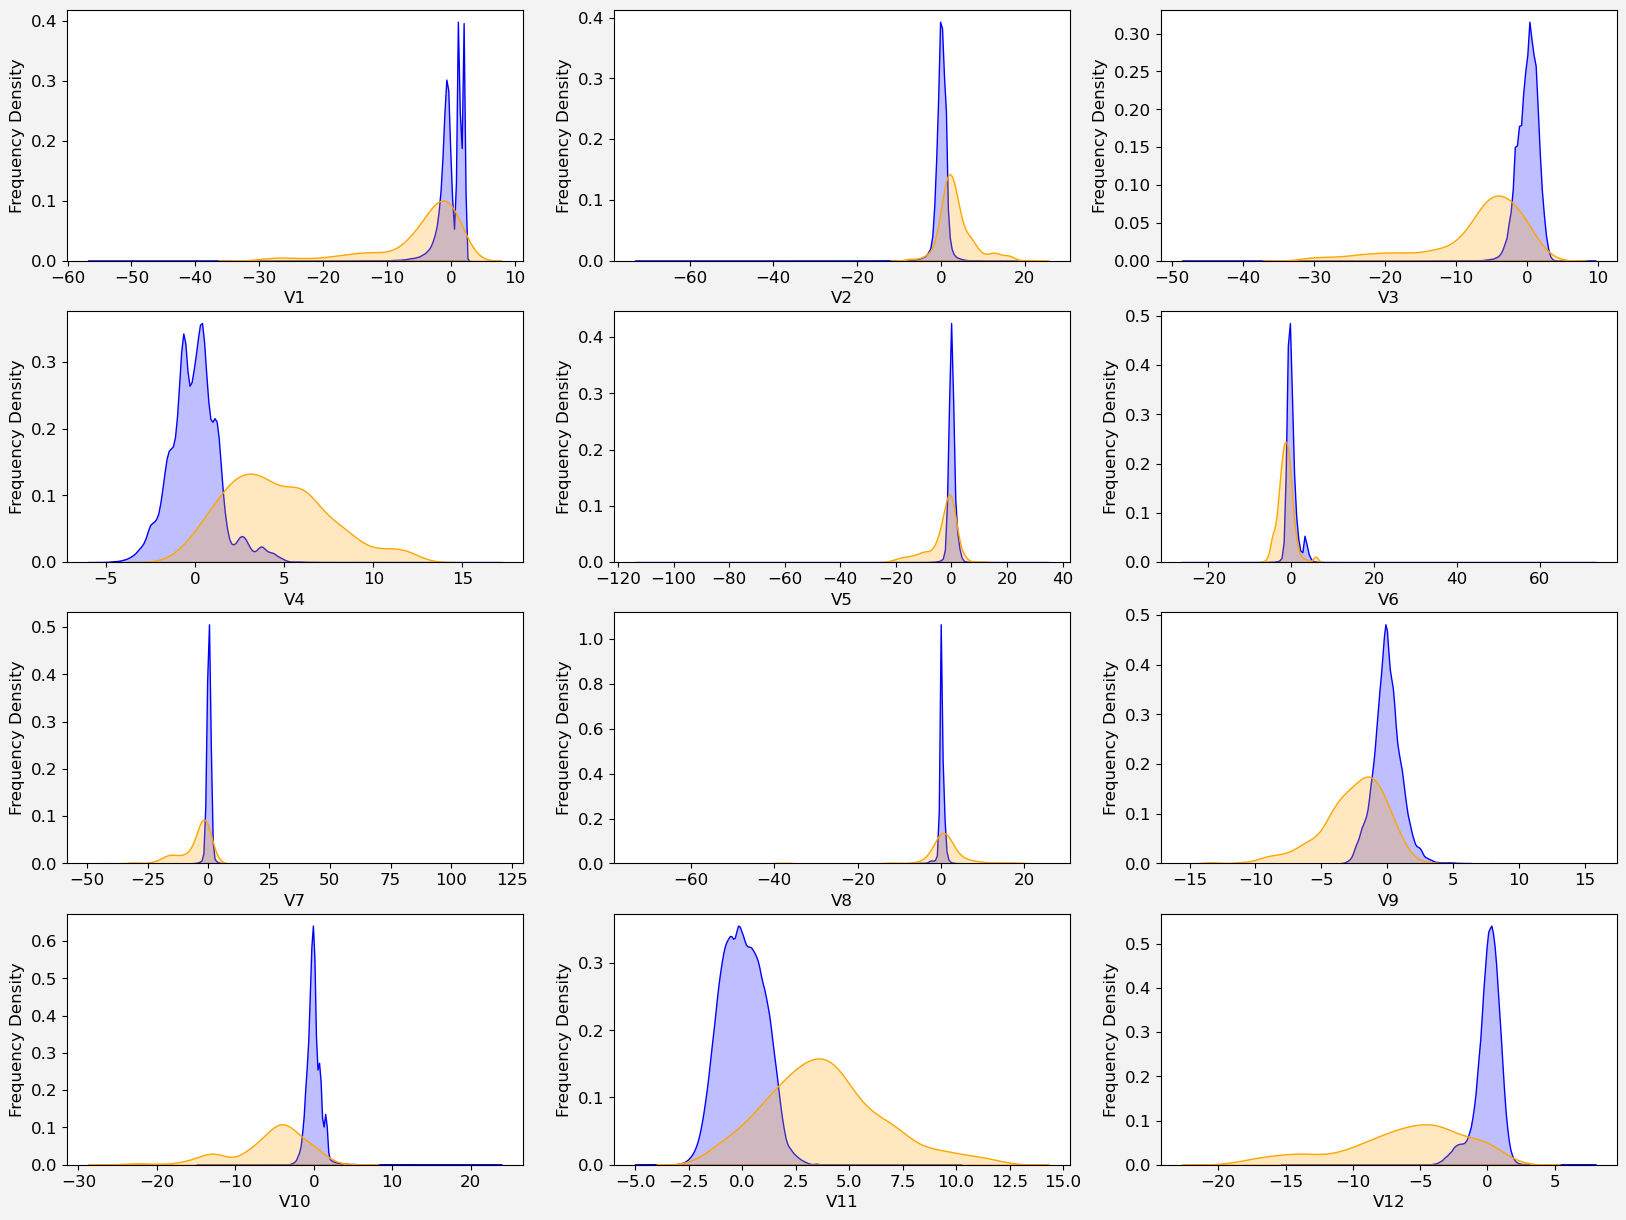

**************************************************************************************************** 



In [23]:
# Evaluate the data distributions of each variable

print(); Line_Separator1()
print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V1 to V12"); Line_Separator1()
fig = plt.figure(figsize=(20,15))
fig.set_facecolor("#F3F3F3")

plt.subplot(431)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V1'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V1'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V1", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(432)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V2'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V2'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V2", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(433)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V3'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V3'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V3", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(434)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V4'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V4'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V4", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(435)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V5'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V5'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V5", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(436)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V6'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V6'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V6", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(437)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V7'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V7'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V7", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(438)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V8'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V8'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V8", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(439)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V9'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V9'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V9", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,10)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V10'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V10'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V10", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,11)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V11'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V11'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V11", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,12)
g=sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0),'V12'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1),'V12'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V12", fontsize=12)
plt.tick_params(labelsize=12)

plt.show(); Line_Separator1()


**************************************************************************************************** 

Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V13 to V24
**************************************************************************************************** 



C:\Users\absar\AppData\Local\Temp\ipykernel_1792\749352584.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0), var], color=colors[0], shade=True, label='Non Fraudulent')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\absar\AppData\Local\Temp\ipykernel_1792\749352584.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1), var], color=colors[1], shade=True, label='Fraudulent')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py

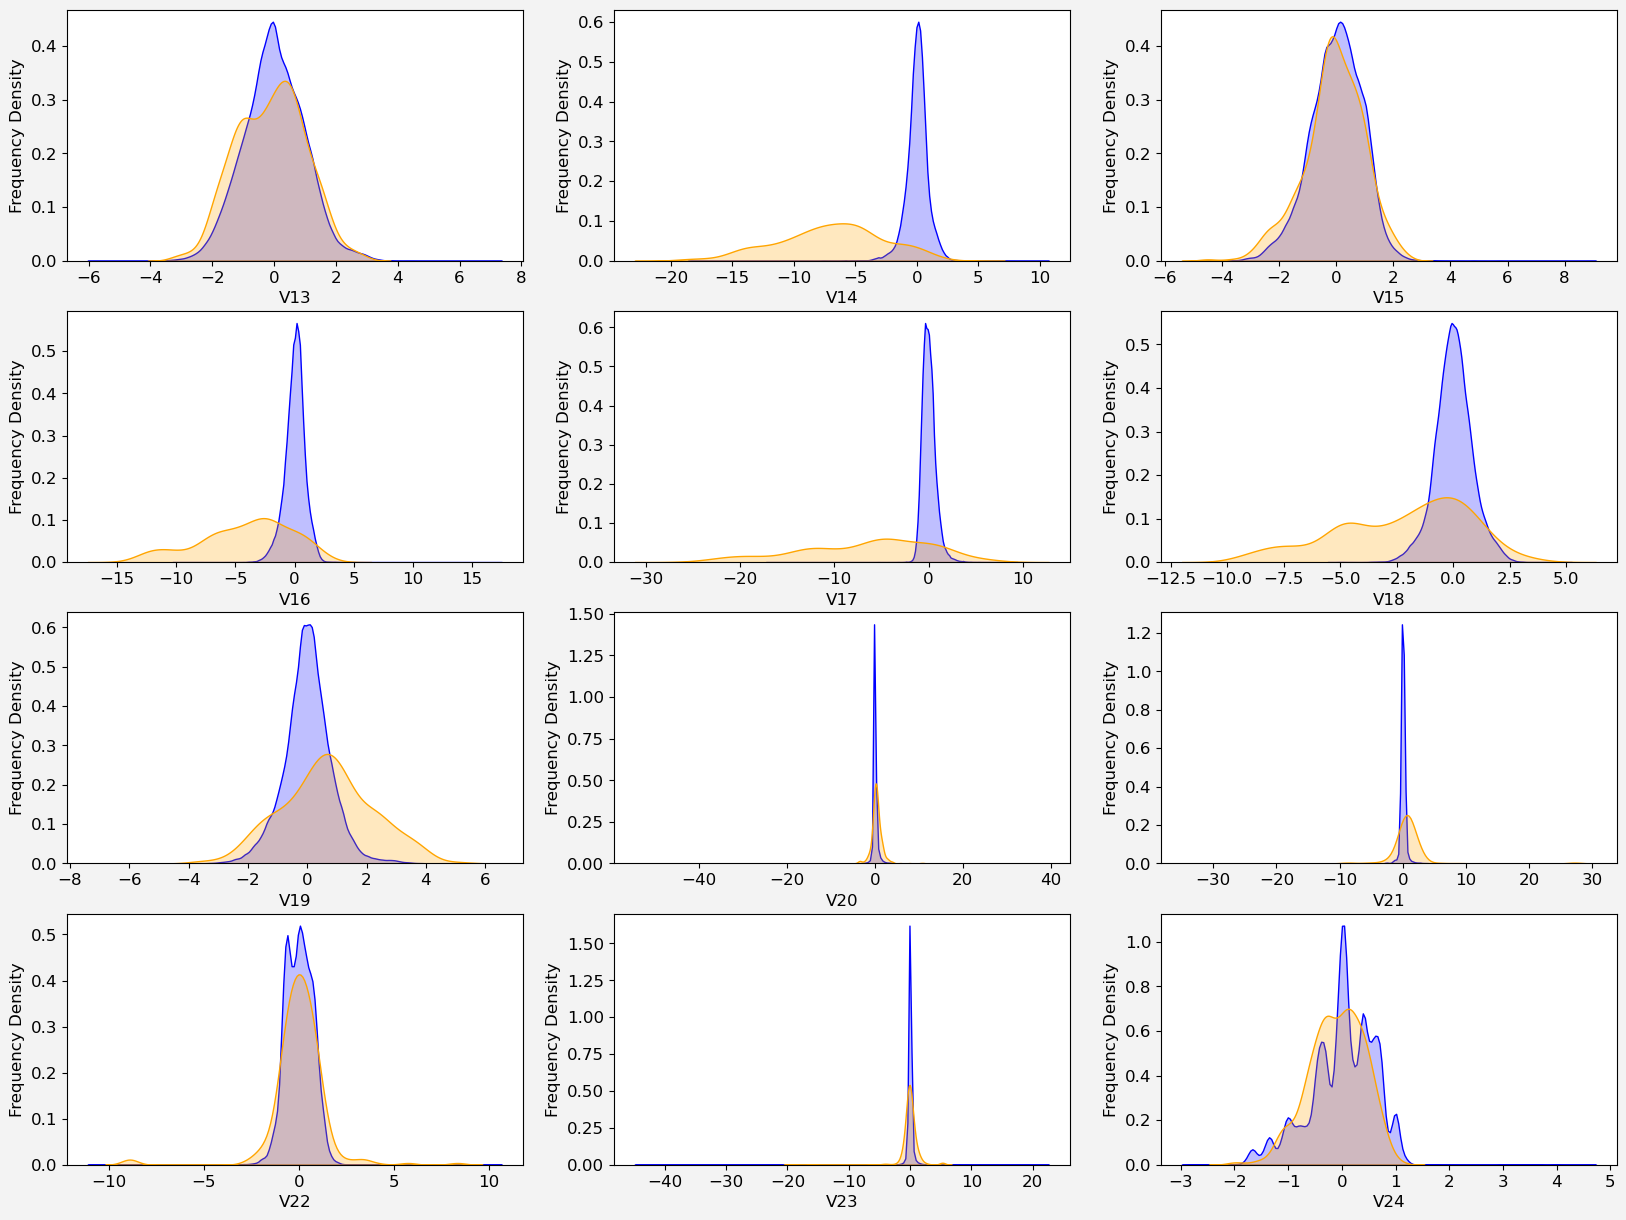

**************************************************************************************************** 



In [24]:
print(); Line_Separator1()
print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V13 to V24"); Line_Separator1()

fig = plt.figure(figsize=(20,15))
fig.set_facecolor("#F3F3F3")

variables = ['V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24']
colors = ['b', 'orange']

for i, var in enumerate(variables):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0), var], color=colors[0], shade=True, label='Non Fraudulent')
    sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1), var], color=colors[1], shade=True, label='Fraudulent')
    plt.grid(False)
    plt.ylabel("Frequency Density", fontsize=12)
    plt.xlabel(var, fontsize=12)
    plt.tick_params(labelsize=12)

plt.show(); Line_Separator1()



**************************************************************************************************** 

Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V25 to V28, Time & Amount
**************************************************************************************************** 



C:\Users\absar\AppData\Local\Temp\ipykernel_1792\2938856559.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0), var], color=colors[0], shade=True, label='Non Fraudulent')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\absar\AppData\Local\Temp\ipykernel_1792\2938856559.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1), var], color=colors[1], shade=True, label='Fraudulent')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.

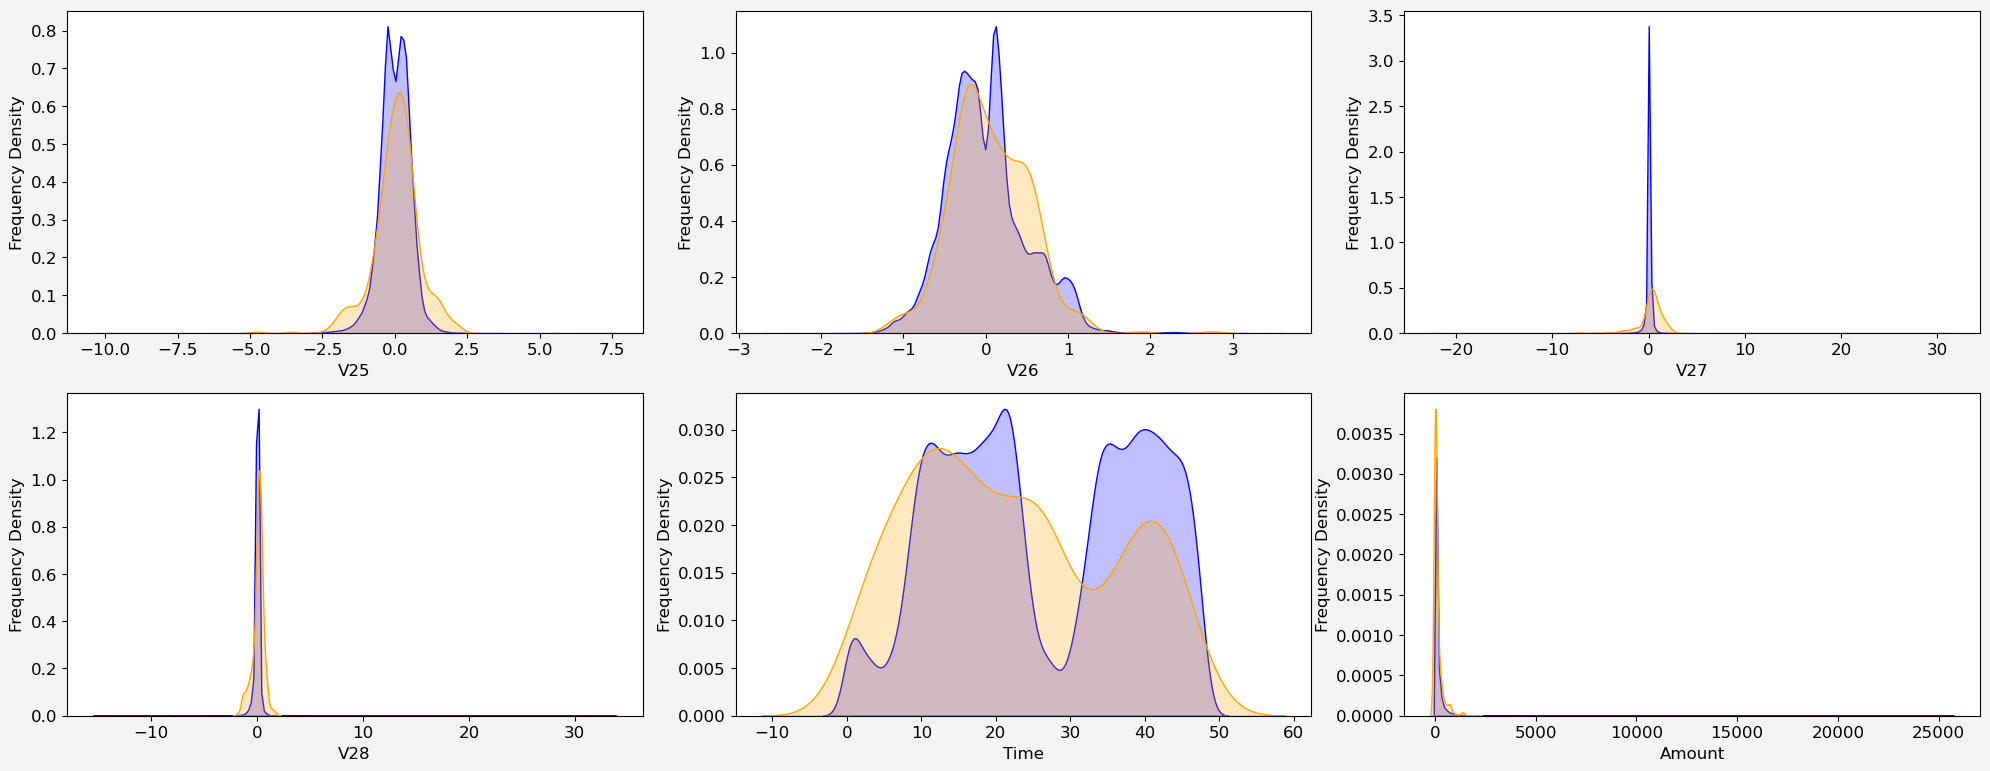

**************************************************************************************************** 



In [26]:
print(); Line_Separator1()
print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V25 to V28, Time & Amount"); Line_Separator1()

fig = plt.figure(figsize=(20,15))
fig.set_facecolor("#F3F3F3")

# List of variables to plot
variables = ['V25', 'V26', 'V27', 'V28', 'Time', 'Amount']
colors = ['b', 'orange']

# Plot each variable in a subplot
for i, var in enumerate(variables):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(creditcard.loc[(creditcard["Class"] == 0), var], color=colors[0], shade=True, label='Non Fraudulent')
    sns.kdeplot(creditcard.loc[(creditcard['Class'] == 1), var], color=colors[1], shade=True, label='Fraudulent')
    plt.grid(False)
    plt.ylabel("Frequency Density", fontsize=12)
    plt.xlabel(var, fontsize=12)
    plt.tick_params(labelsize=12)

plt.tight_layout()
plt.show(); Line_Separator1()


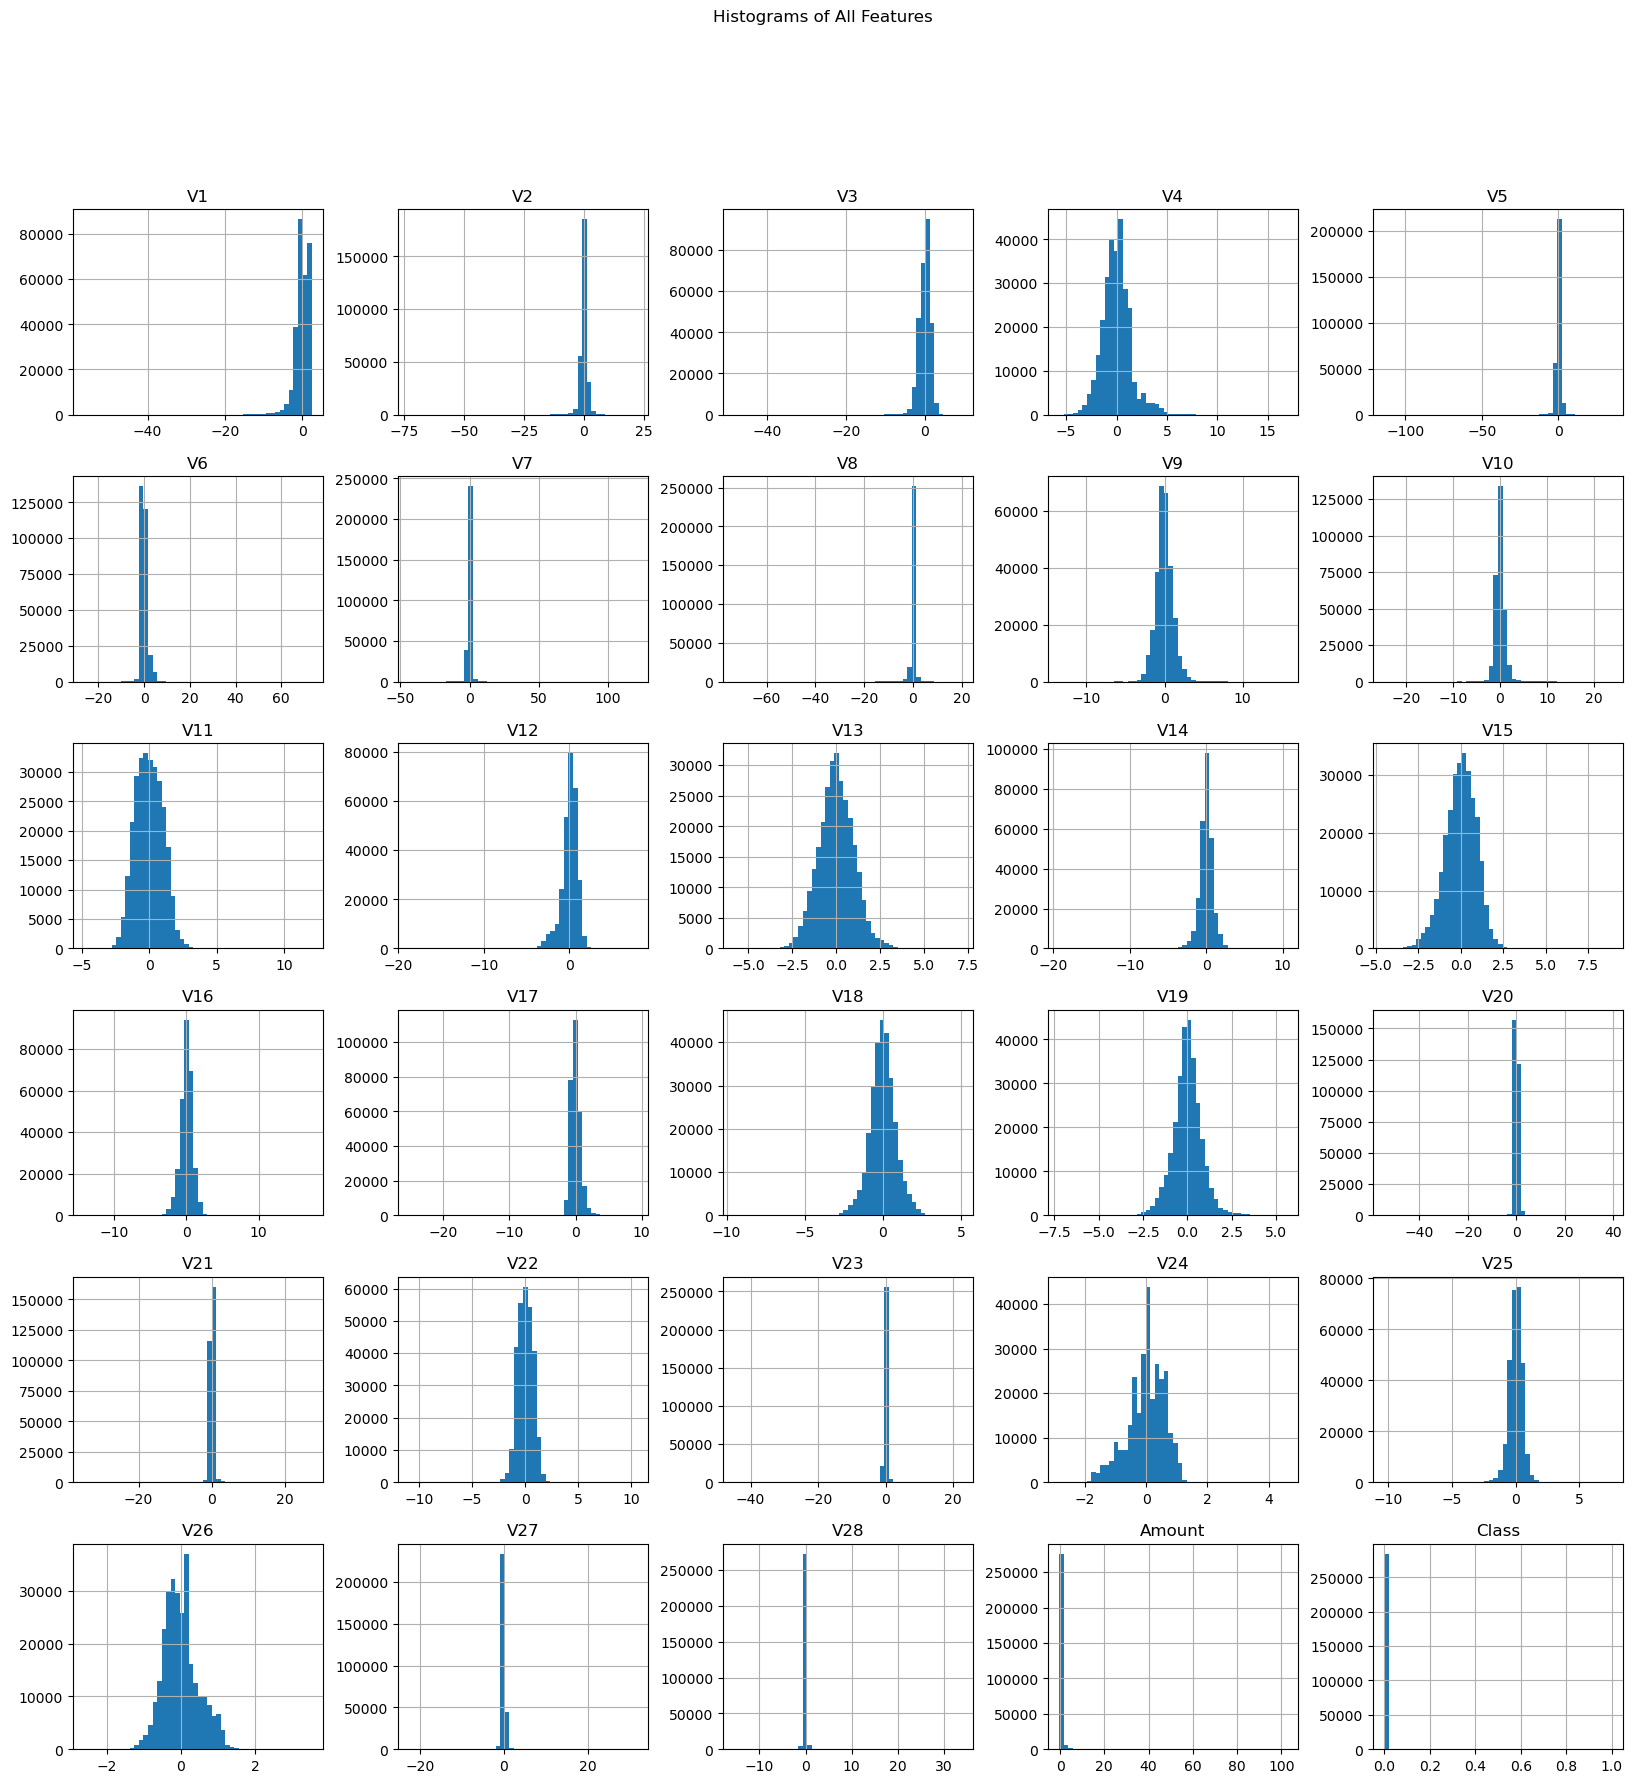

In [130]:
#  Histograms of the features
creditcard.hist(figsize=(20, 20), bins=50)
plt.suptitle('Histograms of All Features')
plt.show()

In [27]:
# Separate data of Non-Fraudulent and Fraudulent to check the skewness and kurtosis

Non_Fraudulent= creditcard[creditcard["Class"] == 0]
print ("Non_Fraudulent:", Non_Fraudulent.shape); Line_Separator()
Fraudulent= creditcard[creditcard["Class"] == 1]
print ("Fraudulent:", Fraudulent.shape); Line_Separator()

Non_Fraudulent: (284315, 31)
************************************************** 

Fraudulent: (492, 31)
************************************************** 



In [28]:
# Non_Fraudulent = to check the skewness and kurtosis.

print ("Non_Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:")
print("")
a = Non_Fraudulent.mean(axis = 0, skipna = True)
b = Non_Fraudulent.var(axis = 0, skipna = True)
c = Non_Fraudulent.skew(axis = 0, skipna = True)
d = Non_Fraudulent.kurtosis(axis = 0, skipna = True)

a.index = b.index
a.index = c.index
a.index = d.index

data_Non_Fraudulent = pd.concat([a, b, c, d] ,axis = 1)
data_Non_Fraudulent.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Non_Fraudulent=data_Non_Fraudulent.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Non_Fraudulent); Line_Separator1()

# -------------------------------------------------------------------------------------------------------------

# Fraudulent = to check the skewness and kurtosis

print ("Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:")
print("")
e = Fraudulent.mean(axis = 0, skipna = True)
f = Fraudulent.var(axis = 0, skipna = True)
g = Fraudulent.skew(axis = 0, skipna = True)
h = Fraudulent.kurtosis(axis = 0, skipna = True)

e.index = f.index
e.index = g.index
e.index = h.index

data_Fraudulent = pd.concat([a, b, c, d] ,axis = 1)
data_Fraudulent.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Fraudulent=data_Fraudulent.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Fraudulent); Line_Separator1()

Non_Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:

   Variables       Mean           Var   Skewness    kurtosis
0       Time  26.343945    173.976216  -0.036015   -1.293597
1         V1   0.008258      3.724182  -3.130188   31.065568
2         V2  -0.006271      2.676974  -4.887166   98.406211
3         V3   0.012171      2.129933  -1.453676   14.545345
4         V4  -0.007860      1.958134   0.581137    2.095716
5         V5   0.005453      1.841318  -2.213903  217.852170
6         V6   0.002419      1.768669   1.842604   42.987534
7         V7   0.009637      1.389598   4.747800  452.920870
8         V8  -0.000987      1.348579  -8.395492  209.772662
9         V9   0.004467      1.186731   0.665635    3.196847
10       V10   0.009824      1.090361   2.422278   21.961970
11       V11  -0.006576      1.006233   0.145537    0.035641
12       V12   0.010832      0.894801  -1.256301    5.300894
13       V13   0.000189      0.990157   0.065582    0.196578
14       V14   

1.Skewness = 0 : normally distributed. ; a zero value means that the tails on both sides of the mean balance out overall,
2.Skewness > 0: more weight in the left tail of the distribution.
3.Skewness < 0: more weight in the right tail of the distribution.
For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for asymmetric distribution, but it can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat.

Note: we will look into this if we require any power transformation to the data. However, they are PCA transformed (not an original one)

In [29]:
# Non-Fraudulent: Evaluate the number of positive skewness variables 

print('Non Fraudulent - Positive skewness:')
left_skewness_Non_Fraudulent= data_Non_Fraudulent[data_Non_Fraudulent.Skewness >0]
print(left_skewness_Non_Fraudulent['Variables'].unique());Line_Separator()


Non Fraudulent - Positive skewness:
['V4' 'V6' 'V7' 'V9' 'V10' 'V11' 'V13' 'V17' 'V19' 'V21' 'V26' 'V28'
 'Amount']
************************************************** 



In [30]:
# Fraudulent : Evaluate the number of positive skewness variables

print('Fraudulent - Positive skewness:')
left_skewness_Fraudulent = data_Fraudulent[data_Fraudulent.Skewness >0]
print(left_skewness_Fraudulent['Variables'].unique());Line_Separator()

Fraudulent - Positive skewness:
['V4' 'V6' 'V7' 'V9' 'V10' 'V11' 'V13' 'V17' 'V19' 'V21' 'V26' 'V28'
 'Amount']
************************************************** 



Positive Skew: Mean > median

In [31]:
# Non-Fraudulent: Evaluate the number of negative skewness variables 
print('Non Fraudulent - Negative skewness:')
right_skewness_Non_Fraudulent= data_Non_Fraudulent[data_Non_Fraudulent.Skewness <0]
print(right_skewness_Non_Fraudulent['Variables'].unique());Line_Separator()

# ---------------------------------------------------------------------------------------

# Fraudulent: Evaluate the number of negative skewness variables 
print('Fraudulent - Negative skewness:')
right_skewness_Fraudulent = data_Fraudulent[data_Fraudulent.Skewness <0]
print(right_skewness_Fraudulent['Variables'].unique());Line_Separator()

Non Fraudulent - Negative skewness:
['Time' 'V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22'
 'V23' 'V24' 'V25' 'V27']
************************************************** 

Fraudulent - Negative skewness:
['Time' 'V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22'
 'V23' 'V24' 'V25' 'V27']
************************************************** 



Negative Skew: Median > mean
Zero Skew: Mean = median (normal distribution)

In [32]:
# We will drop the time column

creditcard = creditcard.drop(['Time'],axis=1)
creditcard.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
from sklearn.preprocessing import StandardScaler

creditcard['Amount'] = StandardScaler().fit_transform(creditcard['Amount'].values.reshape(-1,1)) 
#creditcard['Time'] = StandardScaler().fit_transform(creditcard['Time'].values.reshape(-1,1)) 

In [34]:
# Create X and y

X = creditcard.drop('Class',axis=1)
y = creditcard['Class']

In [131]:
# Evaluate the X dataset

X.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [36]:
# print the data shape

print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


Splitting the dataset to Train and Test¶

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,train_size=0.7,random_state=0)

In [38]:
X_train.shape,X_test.shape

((199364, 29), (85443, 29))

In [39]:
from sklearn.preprocessing import PowerTransformer

# Apply power transformation using 'yeo-johnson' method
creditcard_pt = PowerTransformer(method='yeo-johnson', copy=True)
creditcard_pt.fit(X_train)

# Transform the training and testing data
X_train_pt = creditcard_pt.transform(X_train)
X_test_pt = creditcard_pt.transform(X_test)

# Assign y_train to y_train_pt (No transformation needed for target variable)
y_train_pt = y_train

# Check the transformed data
print("Transformed X_train:")
print(X_train_pt)
print("\nTransformed X_test:")
print(X_test_pt)


Transformed X_train:
[[-0.33770885 -0.01102257 -0.57235046 ...  0.77593717  0.24498919
   0.26901103]
 [ 1.51895074 -0.07177741 -1.04754827 ... -0.19378364 -0.17001016
  -1.00438272]
 [-0.31197914  0.02827872  1.18548492 ... -2.86303833 -3.75196307
   1.53710033]
 ...
 [ 0.91453084 -0.64986905 -0.30330665 ... -0.02475388  0.02292809
  -0.02540907]
 [ 1.18864737 -1.05762182 -0.25216064 ... -0.10639274 -0.09056046
   1.54238638]
 [-0.57339049  0.43435521  1.39405798 ...  0.20053245  0.37915567
  -0.54324531]]

Transformed X_test:
[[-0.44104056  0.66304724 -0.18810682 ...  0.25707589  0.51205027
   0.09573399]
 [-0.45470983  0.56991707 -0.05129711 ...  0.17539152  0.55643464
  -1.00438272]
 [-1.00295267 -1.42039897  0.08726986 ...  0.72258842  1.35143631
   1.01544965]
 ...
 [-0.84755683  0.90865718  0.17575333 ...  0.58546046 -0.09958984
   0.44906462]
 [-0.59375724  0.78018418  1.00795847 ...  0.87944795  0.5344614
  -0.82595122]
 [-0.40386485  1.28302052 -0.04626962 ...  0.91932497  0.

In [40]:
# Rename the x_train and x_test

X_train = X_train_pt
X_test = X_test_pt


In [41]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Apply ADASYN oversampling
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_ada, y_ada = adasyn.fit_resample(X_train, y_train)

# Print the resampled dataset shape
print('Resampled dataset shape %s' % Counter(y_ada))


Resampled dataset shape Counter({0: 199019, 1: 198983})


In [42]:
# Shape of the dataset after balancing it
print(X_ada.shape)
print(y_ada.shape)

(398002, 29)
(398002,)


In [43]:
# Evalute unique data in y_ada

y_ada.unique()

array([0, 1], dtype=int64)

In [44]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Apply ADASYN oversampling
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_ada, y_ada = adasyn.fit_resample(X_train, y_train)

# Print the resampled dataset shape
print('Resampled dataset shape %s' % Counter(y_ada))

# Evaluate whether the dataset is balanced
total_count_combined_class = y_ada.value_counts()
imbalance = (total_count_combined_class[1] / y_ada.count() * 100) / (total_count_combined_class[0] / y_ada.count() * 100) * 100

print('Balance Percentage after ADASYN: ' + str(imbalance) + '%')
Line_Separator1()


Resampled dataset shape Counter({0: 199019, 1: 198983})
Balance Percentage after ADASYN: 99.98191127480293%
**************************************************************************************************** 



In [45]:
# Evaluate the sum of y_ada, y_train and y_test

print(np.sum(y_ada))
print(np.sum(y_train))
print(np.sum(y_test))

198983
345
147


In [46]:
# Rename X_ada and y_ada

X_train = X_ada
y_train = y_ada

In [47]:
# Evaluate the shape of the training and test dataset after balancing it

print(X_train.shape)
print(y_train.shape)

(398002, 29)
(398002,)


Base Model

In [48]:
# Base Model for evaluation

b_m=[]

for i in range (y_test.shape[0]):
    b_m.append(y_test.mode()[0])

len(b_m)

85443

In [49]:
y_pred=pd.Series(b_m)

In [50]:
print('Accuracy (Base Model):', accuracy_score(y_test, y_pred)*100);Line_Separator()

Accuracy (Base Model): 99.82795547909133
************************************************** 



In [53]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="best")
    plt.show()


Model Selection and Model Training

We will use Logistic Regression, K-Nearest Neighbors, Decision Tree, and XGBoost as our models.

1. Let's Create Logistic Model

In [93]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.95      0.03       147

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Confusion Matrix:
[[77288  8008]
 [    7   140]]
ROC-AUC Score: 0.9826247325041441


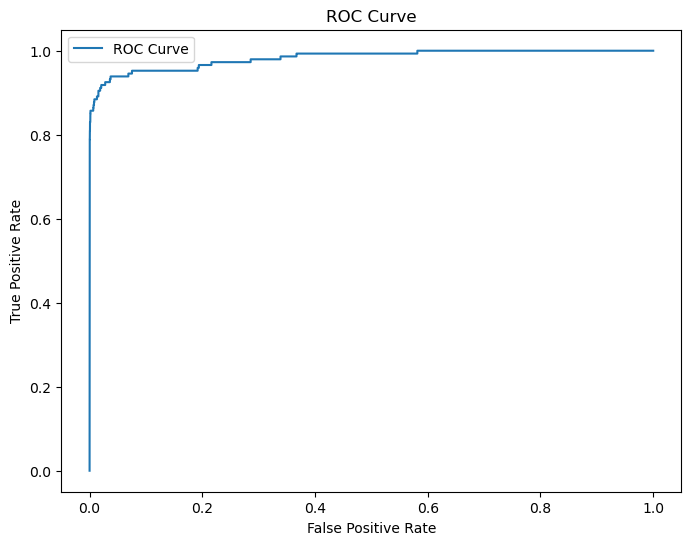

In [105]:
#Model Validation
print("Logistic Regression Evaluation:")
evaluate_model(lr, X_test_pt, y_test)

2.Let's Create KNN Model

In [103]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.48      0.86      0.61       147

    accuracy                           1.00     85443
   macro avg       0.74      0.93      0.81     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85157   139]
 [   21   126]]
ROC-AUC Score: 0.9281157524912047


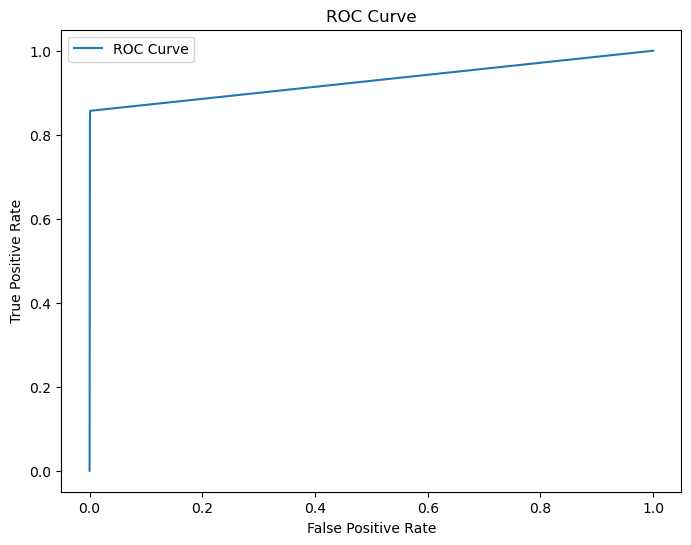

In [104]:
#Model Validation
print("K-Nearest Neighbors Evaluation:")
evaluate_model(knn, X_test_pt, y_test)

3.Lets Create DecisionTreeClassifier Model

In [99]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.39      0.76      0.51       147

    accuracy                           1.00     85443
   macro avg       0.69      0.88      0.76     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85120   176]
 [   36   111]]
ROC-AUC Score: 0.8765193190388141


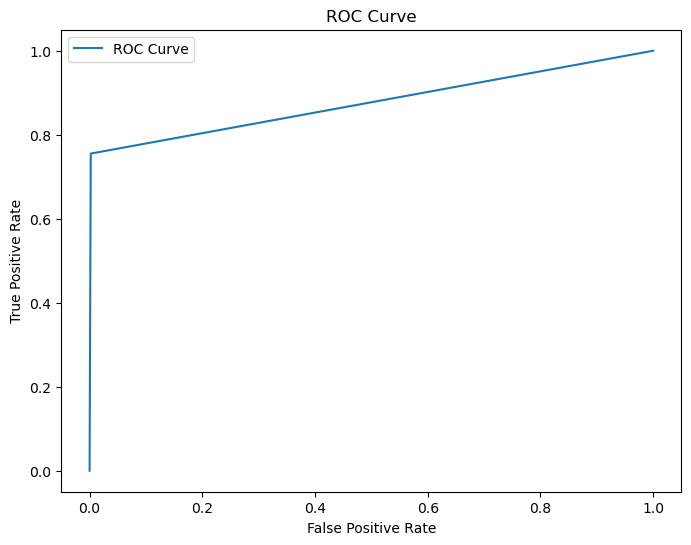

In [100]:
#Model Validation
print("Decision Tree Evaluation:")
evaluate_model(dt, X_test_pt, y_test)

4.Let's Create XGBClassifier Model

In [101]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.71      0.82      0.76       147

    accuracy                           1.00     85443
   macro avg       0.86      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85248    48]
 [   27   120]]
ROC-AUC Score: 0.9586591295681657


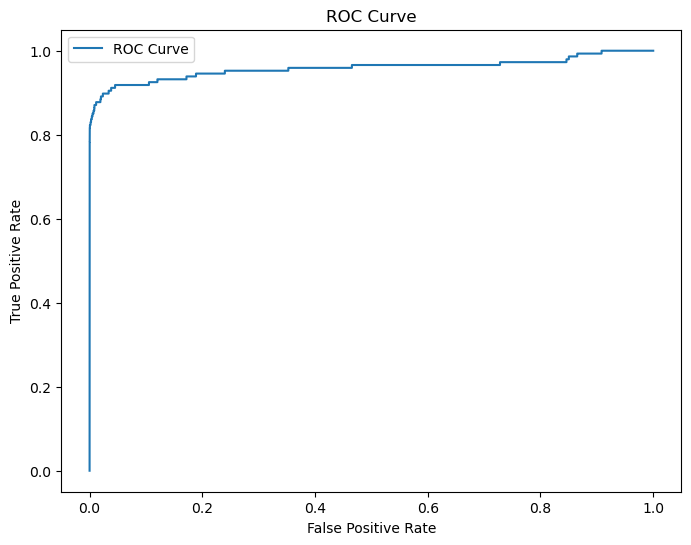

In [102]:
#Model Validation
print("XGBoost Evaluation:")
evaluate_model(xgb, X_test_pt, y_test)

In [61]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

def get_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return f1, accuracy, auc_roc, precision, recall


In [63]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model, storing the results
model_summary = []

for name, model in models.items():
    model.fit(X_train, y_train)
    f1, accuracy, auc_roc, precision, recall = get_model_metrics(model, X_test_pt, y_test)
    model_summary.append([name, f1, accuracy, auc_roc, precision, recall])

# Create a DataFrame for model summary
model_summary_df = pd.DataFrame(model_summary, columns=['Name', 'F1_score', 'Accuracy', 'AUC_ROC', 'Precision', 'Recall'])


In [64]:
model_summary_df = model_summary_df.reset_index(drop=True)
display(model_summary_df)

,Name,F1_score,Accuracy,AUC_ROC,Precision,Recall
0,Logistic Regression,0.033755,0.906195,0.982625,0.017182,0.952381
1,K-Nearest Neighbors,0.611650,0.998127,0.928116,0.475472,0.857143
2,Decision Tree,0.511521,0.997519,0.876519,0.386760,0.755102
3,XGBoost,0.761905,0.999122,0.958659,0.714286,0.816327


All Model Classification Report

In [107]:
# Evaluation and Classification Reports
# Logistic Regression
print("Logistic Regression - Classification Report")
print(classification_report(y_test, lr.predict(X_test_pt)))

# K-Nearest Neighbors
print("K-Nearest Neighbors - Classification Report")
print(classification_report(y_test, knn.predict(X_test_pt)))

# Decision Tree
print("Decision Tree Evaluation - Classification Report")
print(classification_report(y_test, dt.predict(X_test_pt)))

# XGBoost
print("XGBoost - Classification Report")
print(classification_report(y_test, xgb.predict(X_test_pt)))


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.95      0.03       147

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443

K-Nearest Neighbors - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.48      0.86      0.61       147

    accuracy                           1.00     85443
   macro avg       0.74      0.93      0.81     85443
weighted avg       1.00      1.00      1.00     85443

Decision Tree Evaluation - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.39      0.76      0.51       147

    accuracy                           1.00  

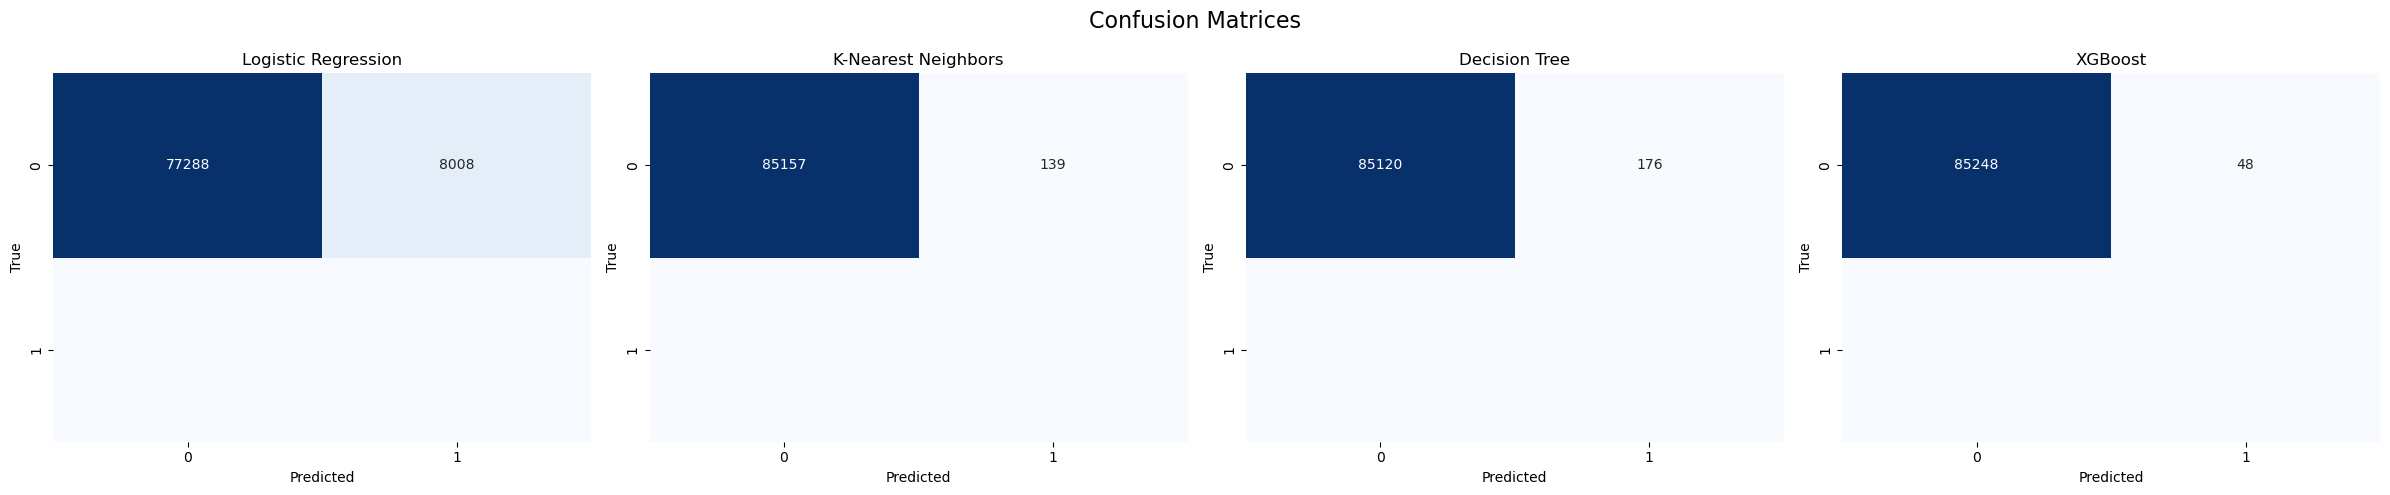

In [109]:
# Confusion matrices
# Logistic Regression
lr_pred = lr.predict(X_test_pt)
lr_cm = confusion_matrix(y_test, lr_pred)

# K-Nearest Neighbors
knn_pred = knn.predict(X_test_pt)
knn_cm = confusion_matrix(y_test, knn_pred)

# DT
dt_pred = dt.predict(X_test_pt)
dt_cm = confusion_matrix(y_test, dt_pred)

# XGBoost
xgb_pred = xgb.predict(X_test_pt)
xgb_cm = confusion_matrix(y_test, xgb_pred)

# Plotting confusion matrices
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
fig.suptitle('Confusion Matrices', fontsize=16)

# Logistic Regression
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# K-Nearest Neighbors
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[1])
axes[1].set_title('K-Nearest Neighbors')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

#dt
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[2])
axes[2].set_title('Decision Tree')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

# XGBoost
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[3])
axes[3].set_title('XGBoost')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

plt.tight_layout()
plt.show()

In [112]:
from sklearn.metrics import confusion_matrix

# Assuming you have computed confusion matrices: lr_cm, knn_cm, xgb_cm

# Function to calculate metrics
def calculate_metrics(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    FPR = FP / (FP + TN)
    PPV = TP / (TP + FP)
    NPV = TN / (TN + FN)
    
    return sensitivity, specificity, FPR, PPV, NPV

# Calculate metrics for Logistic Regression
lr_sensitivity, lr_specificity, lr_fpr, lr_ppv, lr_npv = calculate_metrics(lr_cm)

# Calculate metrics for K-Nearest Neighbors
knn_sensitivity, knn_specificity, knn_fpr, knn_ppv, knn_npv = calculate_metrics(knn_cm)

# Calculate metrics for Decision Tree
dt_sensitivity, dt_specificity, dt_fpr, dt_ppv, dt_npv = calculate_metrics(dt_cm)

# Calculate metrics for XGBoost
xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_ppv, xgb_npv = calculate_metrics(xgb_cm)

# Print metrics for each model
print("Logistic Regression Metrics:")
print(f"Sensitivity: {lr_sensitivity:.4f}, Specificity: {lr_specificity:.4f}, FPR: {lr_fpr:.4f}, PPV: {lr_ppv:.4f}, NPV: {lr_npv:.4f}")

print("\nK-Nearest Neighbors Metrics:")
print(f"Sensitivity: {knn_sensitivity:.4f}, Specificity: {knn_specificity:.4f}, FPR: {knn_fpr:.4f}, PPV: {knn_ppv:.4f}, NPV: {knn_npv:.4f}")

print("\nDecision Tree Metrics:")
print(f"Sensitivity: {dt_sensitivity:.4f}, Specificity: {dt_specificity:.4f}, FPR: {dt_fpr:.4f}, PPV: {dt_ppv:.4f}, NPV: {dt_npv:.4f}")

print("\nXGBoost Metrics:")
print(f"Sensitivity: {xgb_sensitivity:.4f}, Specificity: {xgb_specificity:.4f}, FPR: {xgb_fpr:.4f}, PPV: {xgb_ppv:.4f}, NPV: {xgb_npv:.4f}")


Logistic Regression Metrics:
Sensitivity: 0.9524, Specificity: 0.9061, FPR: 0.0939, PPV: 0.0172, NPV: 0.9999

K-Nearest Neighbors Metrics:
Sensitivity: 0.8571, Specificity: 0.9984, FPR: 0.0016, PPV: 0.4755, NPV: 0.9998

Decision Tree Metrics:
Sensitivity: 0.7551, Specificity: 0.9979, FPR: 0.0021, PPV: 0.3868, NPV: 0.9996

XGBoost Metrics:
Sensitivity: 0.8163, Specificity: 0.9994, FPR: 0.0006, PPV: 0.7143, NPV: 0.9997


# ROC - Curves for all the models

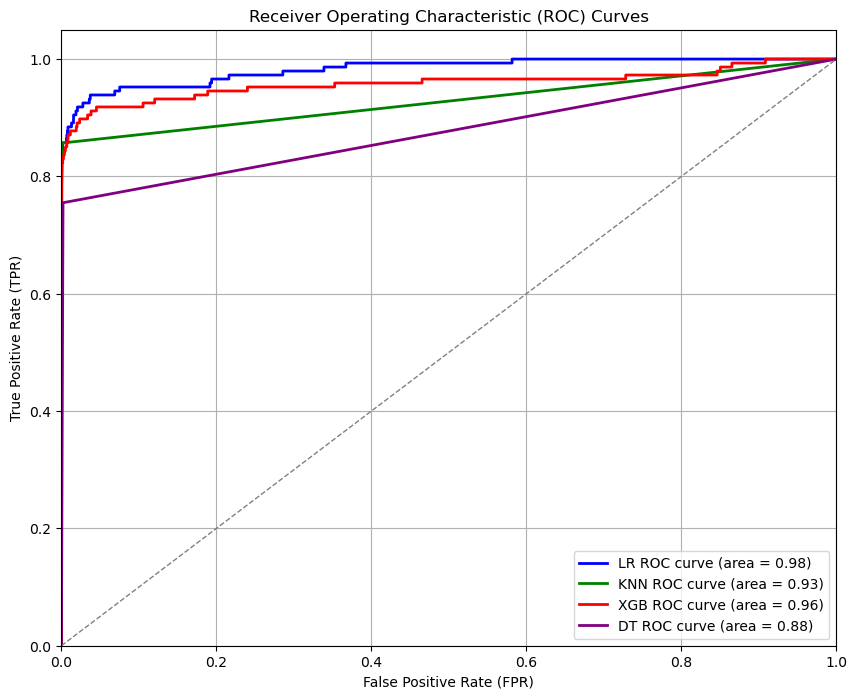

In [117]:
# Initialize models
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
xgb = XGBClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Fit models
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
xgb.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predict probabilities for ROC curve
lr_probs = lr.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_roc_auc = auc(lr_fpr, lr_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_roc_auc = auc(knn_fpr, knn_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_roc_auc = auc(dt_fpr, dt_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, color='blue', lw=2, label=f'LR ROC curve (area = {lr_roc_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label=f'KNN ROC curve (area = {knn_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label=f'XGB ROC curve (area = {xgb_roc_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, color='purple', lw=2, label=f'DT ROC curve (area = {dt_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Hyperparameter Tuning for Logistic Model

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Tuned Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.95      0.03       147

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Confusion Matrix:
[[77297  7999]
 [    7   140]]
ROC-AUC Score: 0.9826173153560805


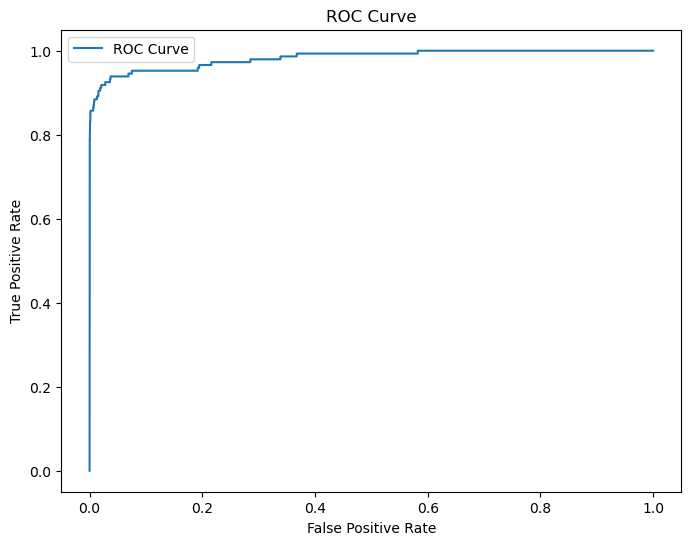

In [85]:
from sklearn.model_seldection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_
print("Tuned Logistic Regression Evaluation:")
evaluate_model(best_lr, X_test_pt, y_test)

Hyperparameter Tuning for Decision Tree

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, 
                              cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the model
dt_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_dt = dt_grid_search.best_estimator_
print(f"Best Parameters for Decision Tree: {dt_grid_search.best_params_}")
print(f"Best Score for Decision Tree: {dt_grid_search.best_score_}")

# Evaluate the best model on the test set
dt_best_pred = best_dt.predict(X_test_pt)
print(classification_report(y_test, dt_best_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Decision Tree: 0.9282164852162472
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.04      0.87      0.08       147

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443



Hyperparameter Tuning for XGBoost

In [119]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'subsample': [0.7, 1.0]
}

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, 
                               cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the model
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_xgb = xgb_grid_search.best_estimator_
print(f"Best Parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best Score for XGBoost: {xgb_grid_search.best_score_}")

# Evaluate the best model on the test set
xgb_best_pred = best_xgb.predict(X_test_pt)
print(classification_report(y_test, xgb_best_pred))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
Best Score for XGBoost: 0.9619449199174854
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.74      0.81      0.77       147

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



Model Deployment

In [121]:
import joblib

# Save the model
joblib.dump(best_xgb, 'best_xgb_model.pkl')
joblib.dump(best_dt, 'best_dt_model.pkl')


['best_dt_model.pkl']

In [123]:
import joblib

# Save the model
joblib.dump(best_xgb, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

Loaded XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.74      0.81      0.77       147

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85254    42]
 [   28   119]]
ROC-AUC Score: 0.9621741399617435


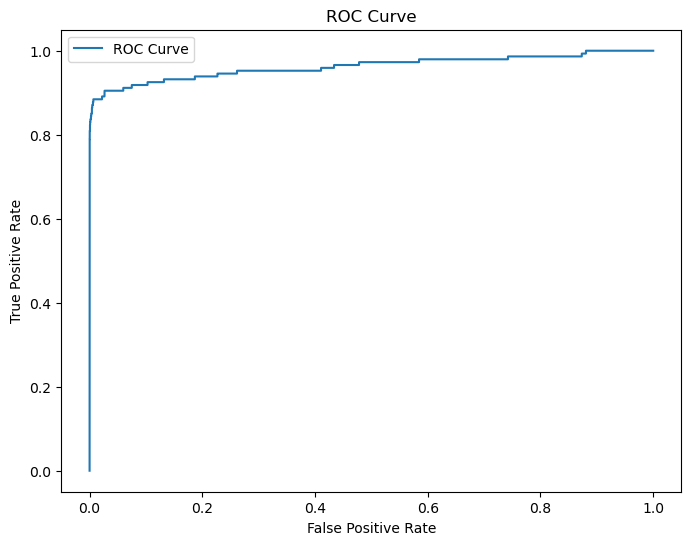


Loaded Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.04      0.87      0.08       147

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Confusion Matrix:
[[82436  2860]
 [   19   128]]
ROC-AUC Score: 0.9049167078198752


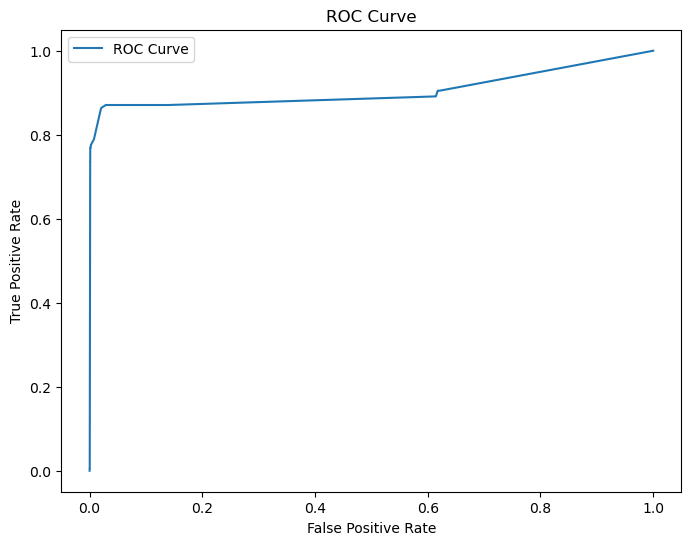

In [122]:
# Load the model
loaded_xgb = joblib.load('best_xgb_model.pkl')
loaded_dt = joblib.load('best_dt_model.pkl')

# Make predictions
new_predictions_xgb = loaded_xgb.predict(X_test)
new_predictions_dt = loaded_dt.predict(X_test)

# Evaluate loaded models
print("Loaded XGBoost Model Evaluation:")
evaluate_model(loaded_xgb, X_test, y_test)

print("\nLoaded Decision Tree Model Evaluation:")
evaluate_model(loaded_dt, X_test, y_test)


In [141]:
import pickle
from xgboost import XGBClassifier
from sklearn.datasets import load_iris


In [142]:
# Initialize and train the model
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [143]:
# Save the model to a file
with open('best_xgb_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [144]:
# Later on, load the model from the file
with open('best_xgb_model.pkl', 'rb') as file:
    best_xgb = pickle.load(file)


In [145]:
# Use the loaded model to make predictions
preds = best_xgb.predict(X_test)

In [146]:
# Print the predictions
print(preds)

[0 0 0 ... 0 0 0]
